In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import atlasify as atl
from atlasify import atlasify

In [2]:
# Open the ROOT file and get data as before
file = uproot.open("fwp1-MCTruth.root")
tree = file["ntpMCTruth;1"]

In [3]:
# tree.keys()
df = tree.arrays([
    "MC_d0p", "MC_d0tht", "MC_d1p", "MC_d1tht", "MC_d0d0p", "MC_d0d0tht",
    "MC_d0d1p", "MC_d0d1tht", "MC_d1d0p", "MC_d1d0tht", "MC_d1d1p", "MC_d1d1tht"
], library="pd")

In [4]:
df.head()

MC_d0p  MC_d0tht    MC_d1p  MC_d1tht  MC_d0d0p  MC_d0d0tht  MC_d0d1p  \
0  1.033974  0.239871  0.683312  0.367729  0.872371    0.351413  0.195205   
1  1.161005  0.074197  0.491778  0.175911  0.869956    0.082744  0.299758   
2  0.901551  0.322980  0.837468  0.348705  0.799884    0.264852  0.145283   
3  1.093844  0.183099  0.600434  0.338107  1.043928    0.161013  0.075812   
4  1.161600  0.072481  0.490714  0.172276  0.991879    0.092488  0.201675   

   MC_d0d1tht  MC_d1d0p  MC_d1d0tht  MC_d1d1p  MC_d1d1tht  
0    0.319741  0.572937    0.525276  0.155483    0.420568  
1    0.244657  0.401650    0.133757  0.141335    0.915516  
2    0.963196  0.791591    0.298991  0.092499    1.233703  
3    0.933094  0.476526    0.174601  0.163074    0.932537  
4    0.559622  0.500947    0.282361  0.067884    1.536319

### MC Kinematics

In [ ]:
def plot_2d_histogram(x, y, bins=100, range=None, cmap='viridis', norm=None, colorbar=True, 
                      banner=None, xlabel=None, ylabel=None, title=None, figsize=(10, 8), 
                      savefig=False, filename="2d_histogram.png", dpi=300, **kwargs):
    """
    Plot a 2D histogram with a color bar.

    Parameters:
        x (array-like): Data for the x-axis.
        y (array-like): Data for the y-axis.
        bins (int or [int, int]): Number of bins or [bins_x, bins_y]. Default is 100.
        range ([[xmin, xmax], [ymin, ymax]]): Range for the bins. Default is None.
        cmap (str or Colormap): Colormap to use. Default is 'viridis'.
        norm (Normalize): Normalization for the colormap (e.g., LogNorm). Default is None.
        colorbar (bool): Whether to add a color bar. Default is True.
        xlabel (str): Label for the x-axis. Default is None.
        ylabel (str): Label for the y-axis. Default is None.
        title (str): Title of the plot. Default is None.
        figsize (tuple): Figure size (width, height). Default is (10, 8).
        savefig (bool): Whether to save the figure. Default is False.
        filename (str): Name of the file to save. Default is "2d_histogram.png".
        dpi (int): DPI for saving the figure. Default is 300.
        **kwargs: Additional keyword arguments passed to `plt.hist2d`.
    """
    plt.close('all')
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the 2D histogram
    H, xedges, yedges, image = ax.hist2d(x, y, bins=bins, range=range, cmap=cmap, norm=norm, **kwargs)
        
    # Handle Colorbar
    if colorbar:
        cbar = plt.colorbar(image, ax=ax, pad=0., shrink=1.0)
        cbar.ax.tick_params(labelsize=16)

    # Handle Labels
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=18)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=18)
    if title:
        ax.set_title(title, fontsize=18)

    # Handle Ticks
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    if banner is not None:
        try:
            import atlasify as atl
            atl.atlasify(
                "Simulation",           # Main Text
                banner,                 # Sub Text
                font_size=18,           # Main Badge
                label_font_size=18,     # Text After Badge
                sub_font_size=14,       # Subtext Font
                subtext_distance=0.0,   # Distance before subtext
                brand="PANDA",          # Change defaults to PANDA
                outside=False,          # Inside or Outside
                # enlarge=1.2,
            )
        except ImportError:
            print("Warning: 'atlasify' module not found. Skipping banner text.")

    # Save the figure if requested
    if savefig:
        fig.savefig(filename, dpi=dpi, bbox_inches='tight')
        
    return ax, fig

In [6]:
n_events = 1000000

In [7]:
banner=r"Simulated: $\bar{p}p \rightarrow \bar{\Lambda} \: (\bar{p}\pi^{+}) \: \Lambda \:  (p\pi^{-})$"+"\nBeam Momentum = 1.642 GeV/c" # FWP, Badge Subtext

- Momentum-Theta Distribution

In [8]:
# Extract Data
data = tree.arrays([
    "MC_d0p", "MC_d0tht", "MC_d1p", "MC_d1tht", "MC_d0d0p", "MC_d0d0tht",
    "MC_d0d1p", "MC_d0d1tht", "MC_d1d0p", "MC_d1d0tht", "MC_d1d1p", "MC_d1d1tht"
    ], library="np"
)

# Concatenate Data
mom = np.concatenate([
    data["MC_d0p"][:n_events], data["MC_d1p"][:n_events], data["MC_d0d0p"][:n_events],
    data["MC_d0d1p"][:n_events], data["MC_d1d0p"][:n_events], data["MC_d1d1p"][:n_events]
])

tht = np.concatenate([
    data["MC_d0tht"][:n_events] * (180 / np.pi), data["MC_d1tht"][:n_events] * (180 / np.pi),
    data["MC_d0d0tht"][:n_events] * (180 / np.pi), data["MC_d0d1tht"][:n_events] * (180 / np.pi),
    data["MC_d1d0tht"][:n_events] * (180 / np.pi), data["MC_d1d1tht"][:n_events] * (180 / np.pi)
])

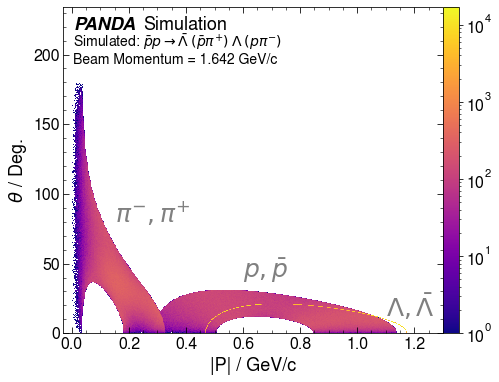

In [9]:
xlabel = "|P| / GeV/c"
ylabel = r"$\theta$ / Deg."

# Plot 2D Histogram
ax, fig = plot_2d_histogram(
    x=mom, y=tht,                   # Input of x and y
    bins=[500, 500],                # Bins for x and y
    range=[[-0.03, 1.3], [0, 180]], # Range for x and y
    cmap='plasma',                  # Colormap
    norm=mcolors.LogNorm(),         # Logarithmic scaling
    banner=banner,                  # Banner Text
    xlabel=xlabel,                  # X Label
    ylabel=ylabel,                  # Y Label
    figsize=(8,6),                  # Figure size
    savefig=False,                  # Save figure
    filename="mcMomTht.pdf"         # Figure name with type
);

# Add annotations
annotations = [
    (1.1, 12, r"$\Lambda, \bar{\Lambda}$", 25, "grey"),
    (0.15, 80, r"$\pi^{-}, \pi^{+}$", 25, "grey"),
    (0.6, 40, r"$p, \bar{p}$", 25, "grey"),
]
for x, y, text, size, *color in annotations:
    ax.text(x, y, text, fontsize=size, fontweight='bold', color=color[0] if color else 'black')

# Add lines
lines = [
    (-5, 20, 1.1, 20), 
    (-5, 180, 1.1, 180),
]
for x1, y1, x2, y2 in lines:
    # ax.plot([x1, x2], [y1, y2], 'k--', linewidth=1)
    pass
    
fig.savefig("mcMomTht_1642.png", dpi=300, bbox_inches='tight')

- Vetex Postions

In [8]:
# Extract Data
data = tree.arrays([
    "MC_d0d0z", "MC_d0d0x", "MC_d0d0y",
    "MC_d1d0z", "MC_d1d0x", "MC_d1d0y",
    ], library="np"
)


# Concatenate Data
z_vtx = np.concatenate([
    data["MC_d0d0z"][:n_events], 
    data["MC_d1d0z"][:n_events]
    ])

r_vtx = np.concatenate([
    np.sqrt(data["MC_d0d0x"]*data["MC_d0d0x"]+data["MC_d0d0y"]*data["MC_d0d0y"])[:n_events],
    np.sqrt(data["MC_d1d0x"]*data["MC_d1d0x"]+data["MC_d1d0y"]*data["MC_d1d0y"])[:n_events]
    ])

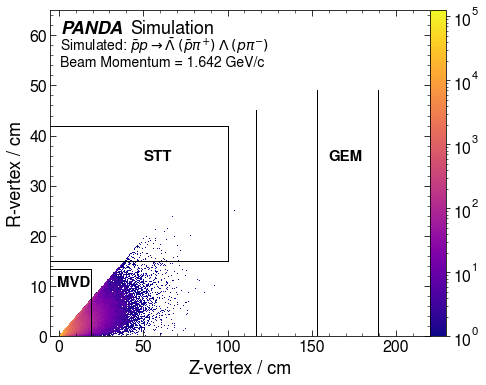

In [10]:
xlabel = "Z-vertex / cm"
ylabel = "R-vertex / cm"

# Plot 2D Histogram
ax, fig = plot_2d_histogram(
    x=z_vtx, y=r_vtx,             # Input of x and y
    bins=[500, 500],              # Bins for x and y
    range=[[-5,220], [0,50]],     # Range for x and y
    cmap='plasma',                # Colormap
    norm=mcolors.LogNorm(),       # Logarithmic scaling
    banner=banner,                # Banner Text
    xlabel=xlabel,                # X Label
    ylabel=ylabel,                # Y Label
    figsize=(8,6),                # Figure size
    savefig=False,                # Save figure
    filename="mcVtx.pdf"          # Figure name with type
);

# Add annotations
annotations = [
    (50, 35, "STT", 15, 'black'),
    (-1, 10, "MVD", 15, 'black'),
    (160, 35, "GEM", 15, 'black')
]
for x, y, text, size, *color in annotations:
    ax.text(x, y, text, fontsize=size, fontweight='bold', color=color[0] if color else 'black')

# Add lines
lines = [
    (-5, 13.5, 19, 13.5),  # MVD Boundary
    (19, 0, 19, 13.5),     # MVD Edge
    (-5, 15, 100, 15),     # STT Lower Boundary
    (-5, 42, 100, 42),     # STT Upper Boundary
    (100, 15, 100, 42),    # STT Side
    (117, 0, 117, 45),     # GEM Left
    (153, 0, 153, 49),     # GEM Middle
    (189, 0, 189, 49),     # GEM Right
]
for x1, y1, x2, y2 in lines:
    ax.plot([x1, x2], [y1, y2], 'k-', linewidth=1)
    
fig.savefig("mcVtx_1642.pdf", dpi=300, bbox_inches='tight')